In [1]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)

In [2]:
import pandas as pd

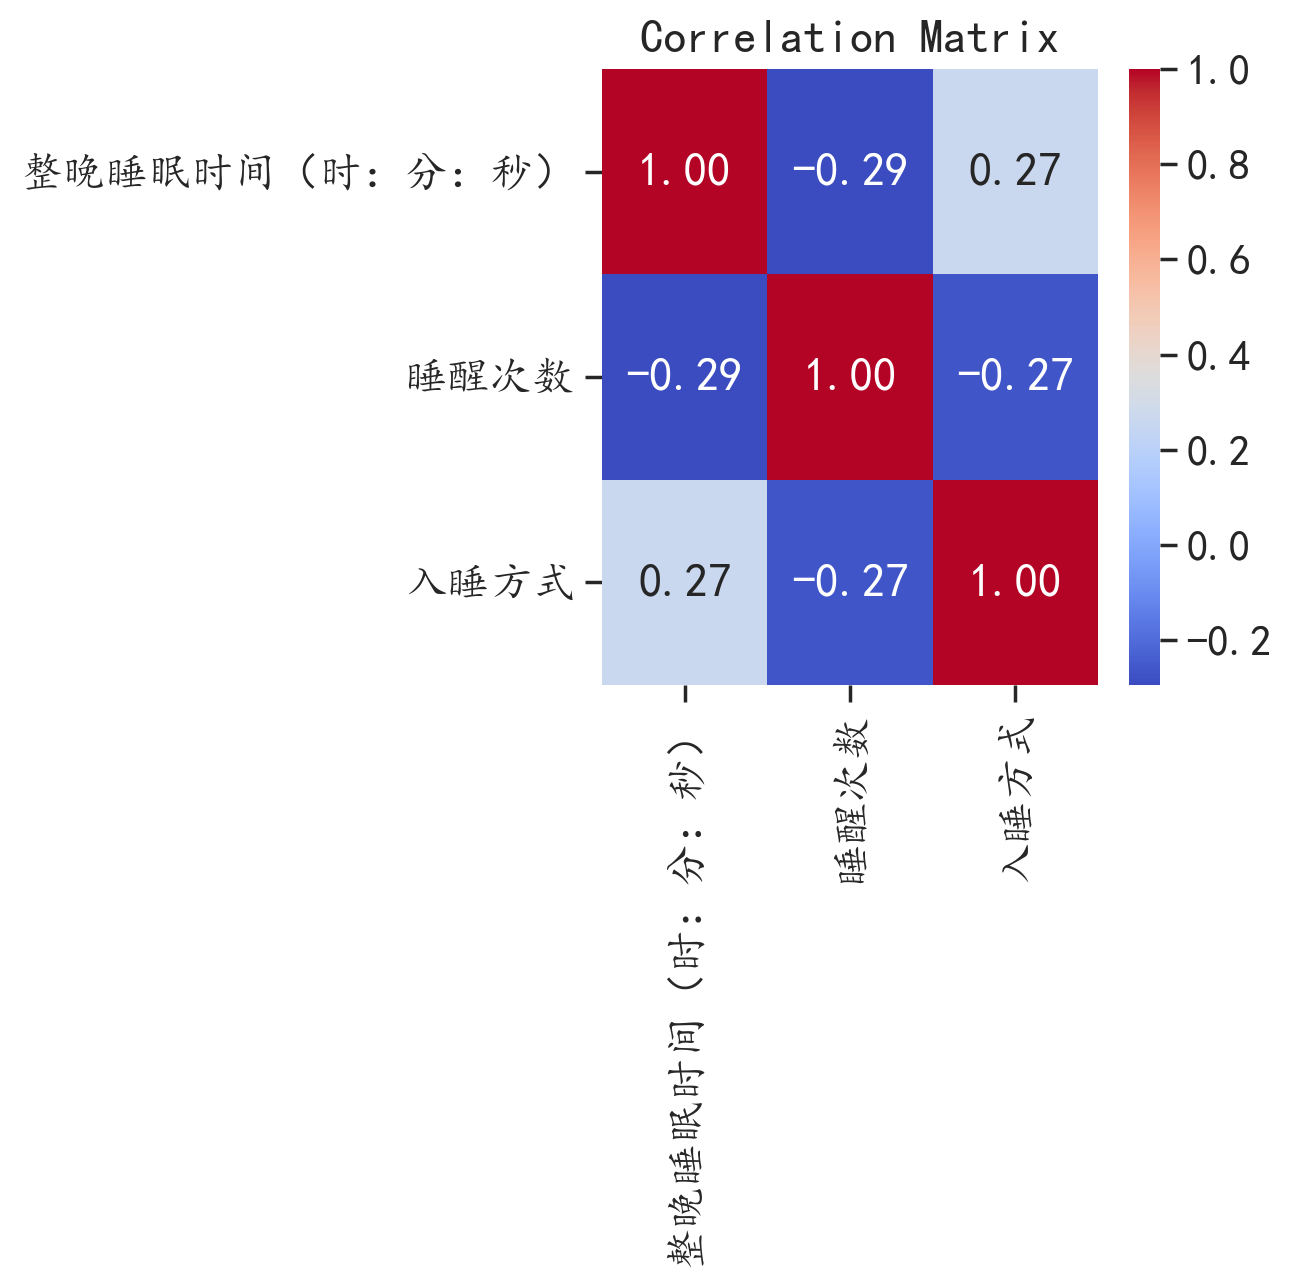

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('data3.csv')

# 绘制相关性矩阵图
correlation_matrix = data.corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

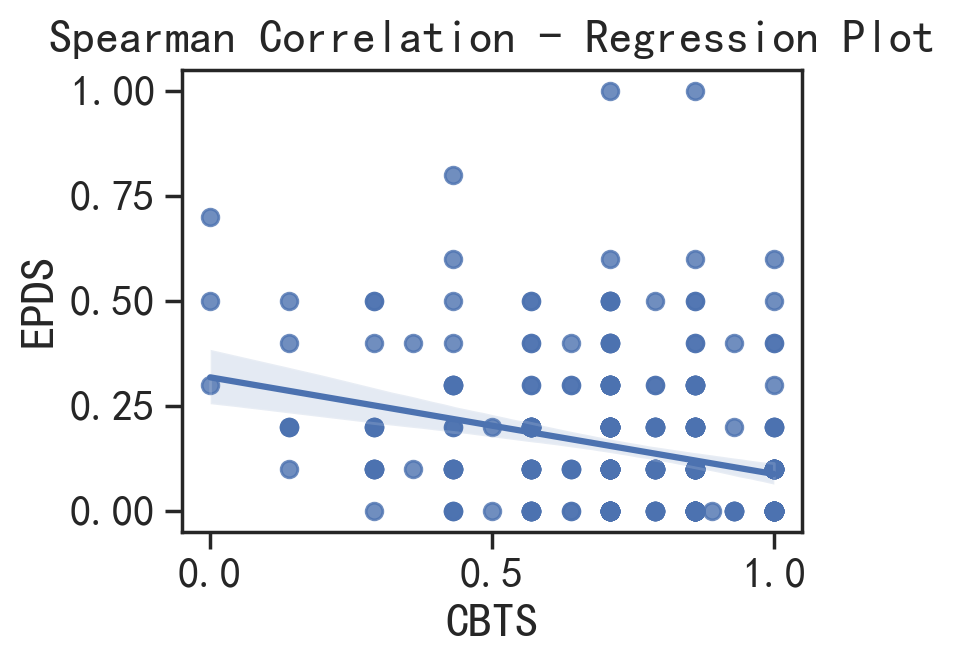

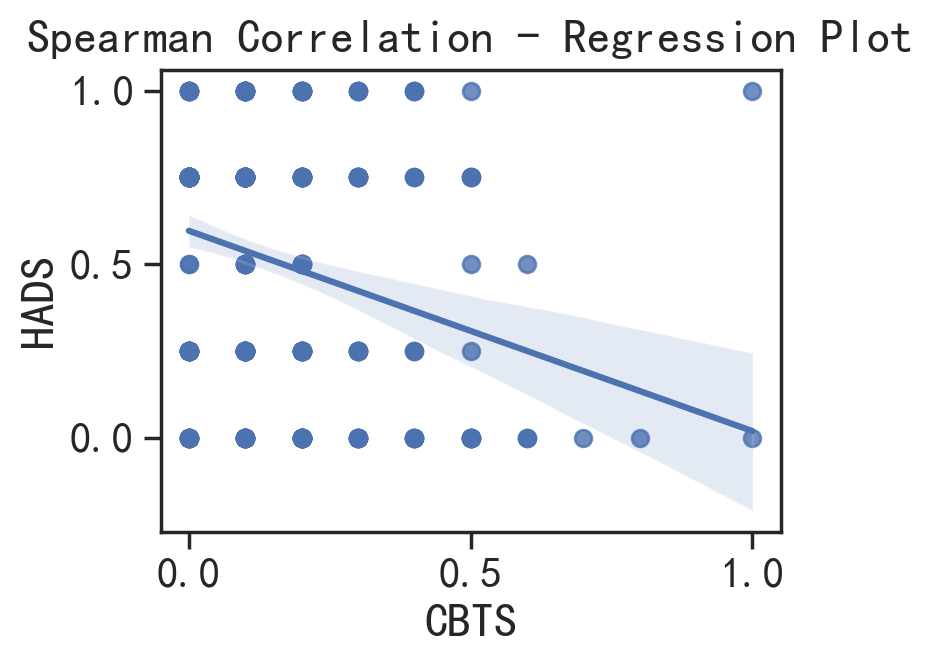

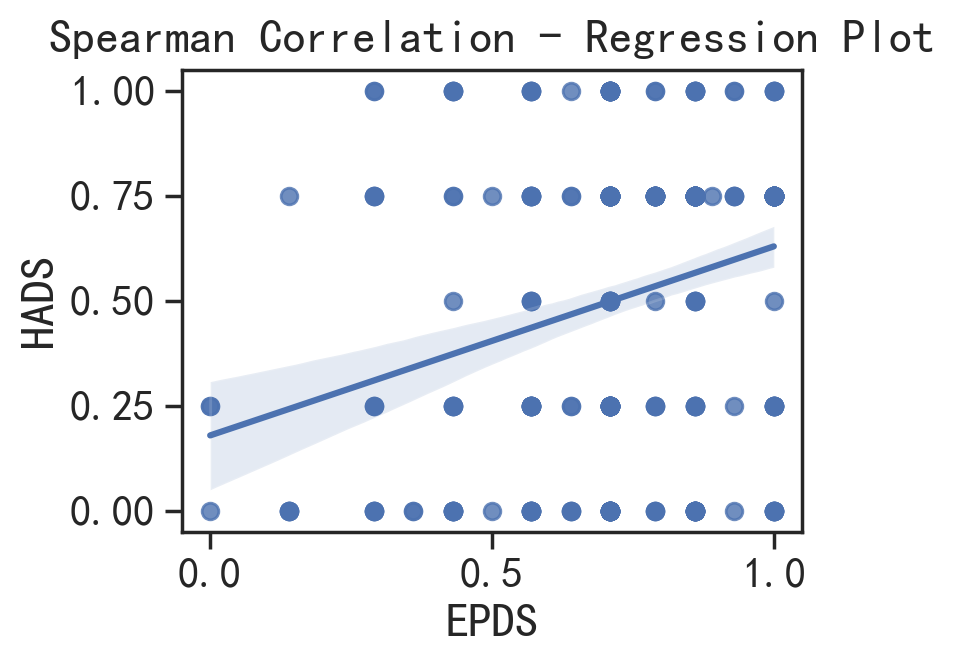

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
data = pd.read_csv('data5.csv')

# 计算Spearman相关系数
spearman_corr = data.corr(method='spearman')

# 绘制线性回归图
plt.figure(figsize=(4, 3))
sns.regplot(x='整晚睡眠时间（时：分：秒）', y='睡醒次数', data=data)
plt.title('Spearman Correlation - Regression Plot')
plt.xlabel('CBTS')
plt.ylabel('EPDS')

# 绘制线性回归图
plt.figure(figsize=(4, 3))
sns.regplot(x='睡醒次数', y='入睡方式', data=data)
plt.title('Spearman Correlation - Regression Plot')
plt.xlabel('CBTS')
plt.ylabel('HADS')

# 绘制线性回归图
plt.figure(figsize=(4, 3))
sns.regplot(x='整晚睡眠时间（时：分：秒）', y='入睡方式', data=data)
plt.title('Spearman Correlation - Regression Plot')
plt.xlabel('EPDS')
plt.ylabel('HADS')

plt.show()


In [7]:
print('两个正相关，一个负相关')

两个正相关，一个负相关


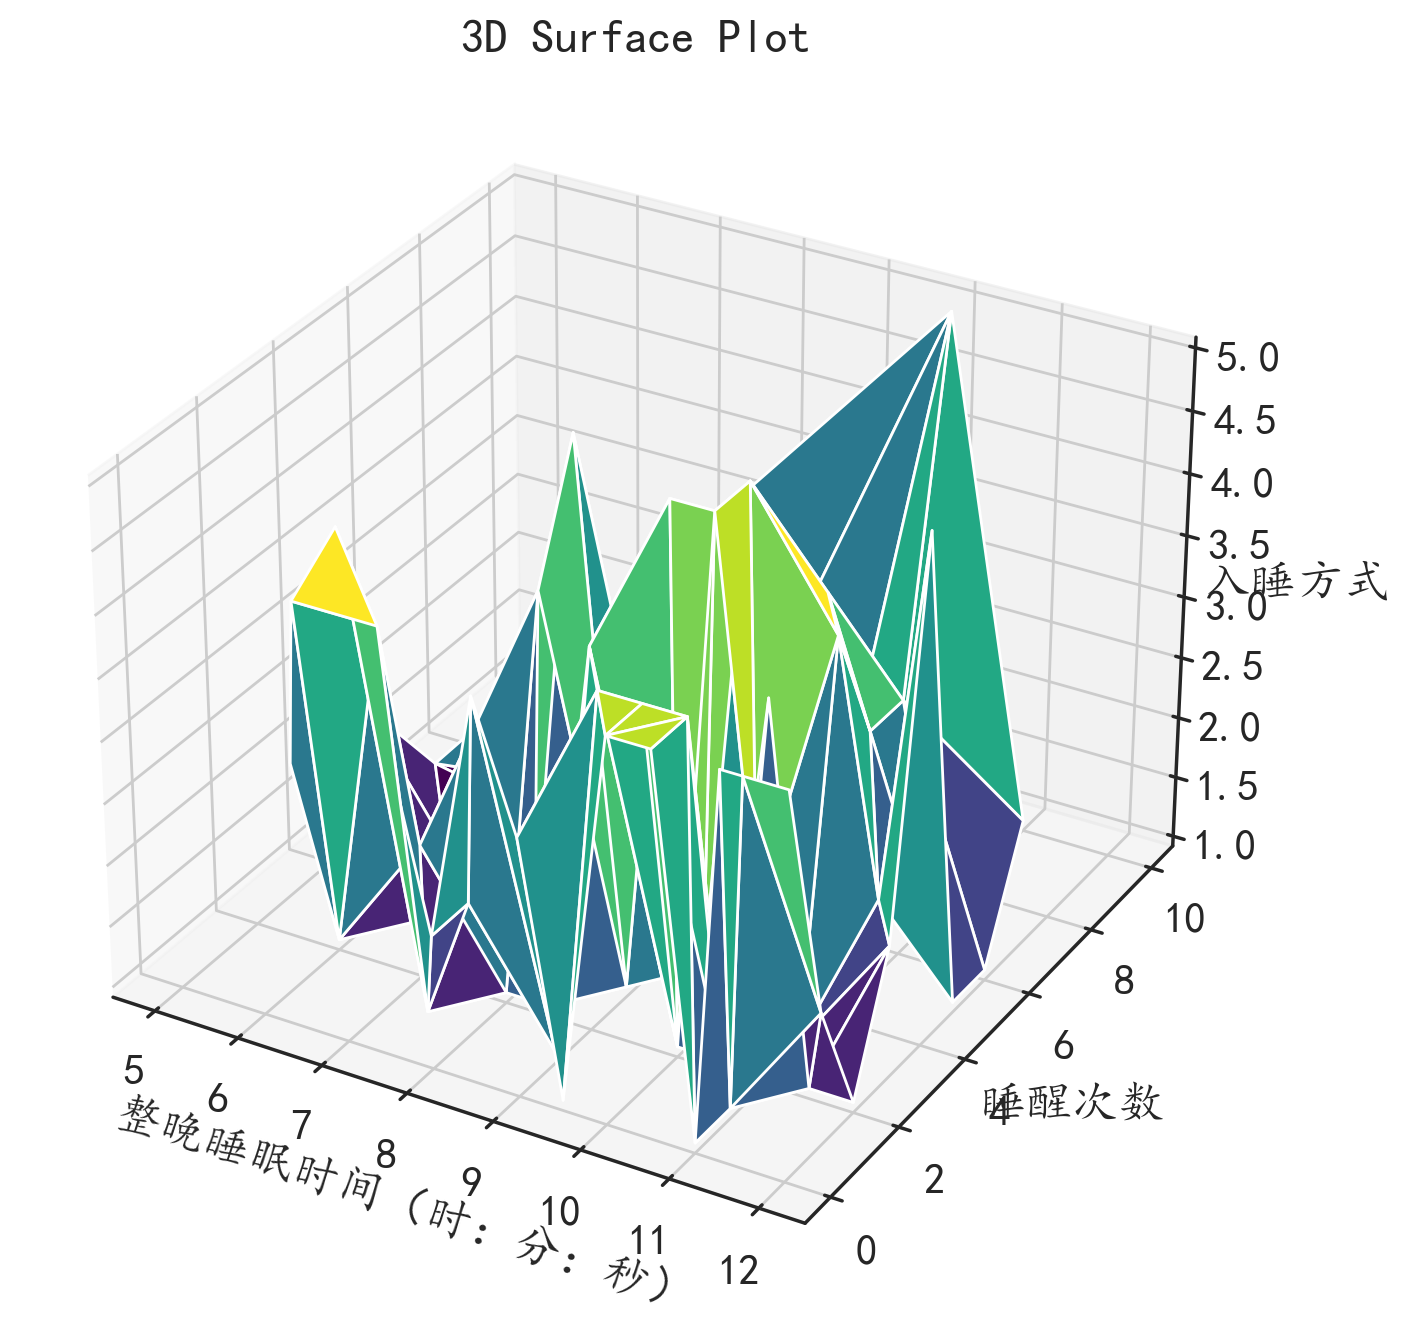

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 读取数据
data = pd.read_csv('data3.csv')

# 准备数据
X = data['整晚睡眠时间（时：分：秒）']
Y = data['睡醒次数']
Z = data['入睡方式']

# 绘制三维曲面图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(X, Y, Z, cmap='viridis')

ax.set_xlabel('整晚睡眠时间（时：分：秒）')
ax.set_ylabel('睡醒次数')
ax.set_zlabel('入睡方式')

plt.title('3D Surface Plot')
plt.show()

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 读取CSV数据
data = pd.read_csv('data3.csv')

# 提取三个变量的数据
X = data[['整晚睡眠时间（时：分：秒）','睡醒次数', '入睡方式']]

# 对数据进行标准化处理（PCA对数据的尺度敏感，需要进行标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建PCA模型，指定主成分数量为1
pca = PCA(n_components=1)

# 对数据进行PCA转换
X_pca = pca.fit_transform(X_scaled)

print(X_pca)
# 将PCA转换后的数据添加为新的一列并保留小数点后3位
data['PCA'] = X_pca.round(3)

# 将带有新列的数据保存到原始数据文件中
data.to_csv('data4.csv', index=False)

[[ 1.04144616]
 [-1.24940676]
 [-0.48699501]
 [ 0.67971959]
 [-0.68688539]
 [-1.6528052 ]
 [-0.48518617]
 [-0.48518617]
 [ 0.31980187]
 [-1.24940676]
 [ 0.23464927]
 [-0.12436403]
 [-1.24940676]
 [-1.6528052 ]
 [ 1.08311804]
 [-1.29198306]
 [-1.6528052 ]
 [-0.08088331]
 [-1.6528052 ]
 [ 2.69671182]
 [-1.6528052 ]
 [ 1.12840761]
 [ 0.76577662]
 [ 0.31889745]
 [-1.6528052 ]
 [-1.24940676]
 [-0.12436403]
 [-0.48518617]
 [ 0.68062402]
 [-1.6528052 ]
 [-0.04192469]
 [-0.84600831]
 [ 0.31980187]
 [-1.6528052 ]
 [-1.24940676]
 [ 0.27903441]
 [ 0.31889745]
 [ 1.84733862]
 [-0.038307  ]
 [-0.84781716]
 [-0.52776247]
 [ 0.88141882]
 [ 0.92399512]
 [ 0.11810265]
 [-0.12526845]
 [ 1.04144616]
 [-1.6528052 ]
 [-0.04192469]
 [ 1.89081935]
 [-0.48518617]
 [ 0.43815733]
 [ 1.80476232]
 [-1.24940676]
 [ 3.78008266]
 [-0.48518617]
 [-0.68688539]
 [-1.29198306]
 [ 2.25073707]
 [-1.6528052 ]
 [-0.88768019]
 [-0.84600831]
 [-0.84600831]
 [-0.08450099]
 [-1.08937942]
 [-1.6528052 ]
 [ 1.84733862]
 [ 2.56898

使用因子分析法

In [44]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# 读取数据
data = pd.read_csv('data3.csv')

# 只选择'整晚睡眠时间'和'睡醒次数'两列数据用于因子分析
# 你可以根据实际需求选择不同的列进行分析
selected_columns = ['整晚睡眠时间（时：分：秒）', '睡醒次数','入睡方式']
selected_data = data[selected_columns]

# 使用因子分析法，指定因子数为1
factor_model = FactorAnalyzer(n_factors=1, rotation=None)

# 拟合数据
factor_model.fit(selected_data)

# 获取因子载荷矩阵（成分矩阵）
factor_loadings = factor_model.loadings_

# 打印因子载荷矩阵
print("因子载荷矩阵（成分矩阵）表：")
print(pd.DataFrame(factor_loadings, index=selected_columns, columns=['Factor 1']))



因子载荷矩阵（成分矩阵）表：
               Factor 1
整晚睡眠时间（时：分：秒） -0.540604
睡醒次数           0.543433
入睡方式          -0.490766


In [3]:
data = pd.read_csv('data2.csv')
# Calculate the scores
data['评分标准'] = 0.54 * data['整晚睡眠时间（时：分：秒）'] - 0.54 * data['睡醒次数'] +0.49 * data['入睡方式']
# Round the '评分标准' values to two decimal places
data['评分标准'] = data['评分标准'].round(2)
# Output the data with the new '评分标准' column
print(data)
# Save the updated data to a new CSV file
data.to_csv('data7.csv', index=False)

      编号  母亲年龄  婚姻状况  教育程度  妊娠时间（周数）  分娩方式  CBTS  EPDS  HADS  婴儿行为特征  婴儿性别  \
0      1    34     2     5      37.0     1     3    13     9       1     1   
1      2    33     2     5      42.0     1     0     0     3       0     2   
2      3    37     2     5      41.0     1     4     8     9       0     1   
3      4    31     2     5      37.5     1     6    16    13       0     2   
4      5    36     1     5      40.0     1     1     3     3       1     2   
..   ...   ...   ...   ...       ...   ...   ...   ...   ...     ...   ...   
375  376    27     2     5      42.0     1    12    20    14       1     1   
376  377    31     2     3      39.0     1     4     7    12       1     1   
377  378    31     2     5      41.6     1     0     3     1       0     1   
378  379    27     2     3      40.0     1     1    10     5       0     1   
379  380    32     2     5      37.0     1    10    10     6       1     1   

     婴儿年龄（月）  整晚睡眠时间（时：分：秒）  睡醒次数  入睡方式  评分标准  
0          1   

d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


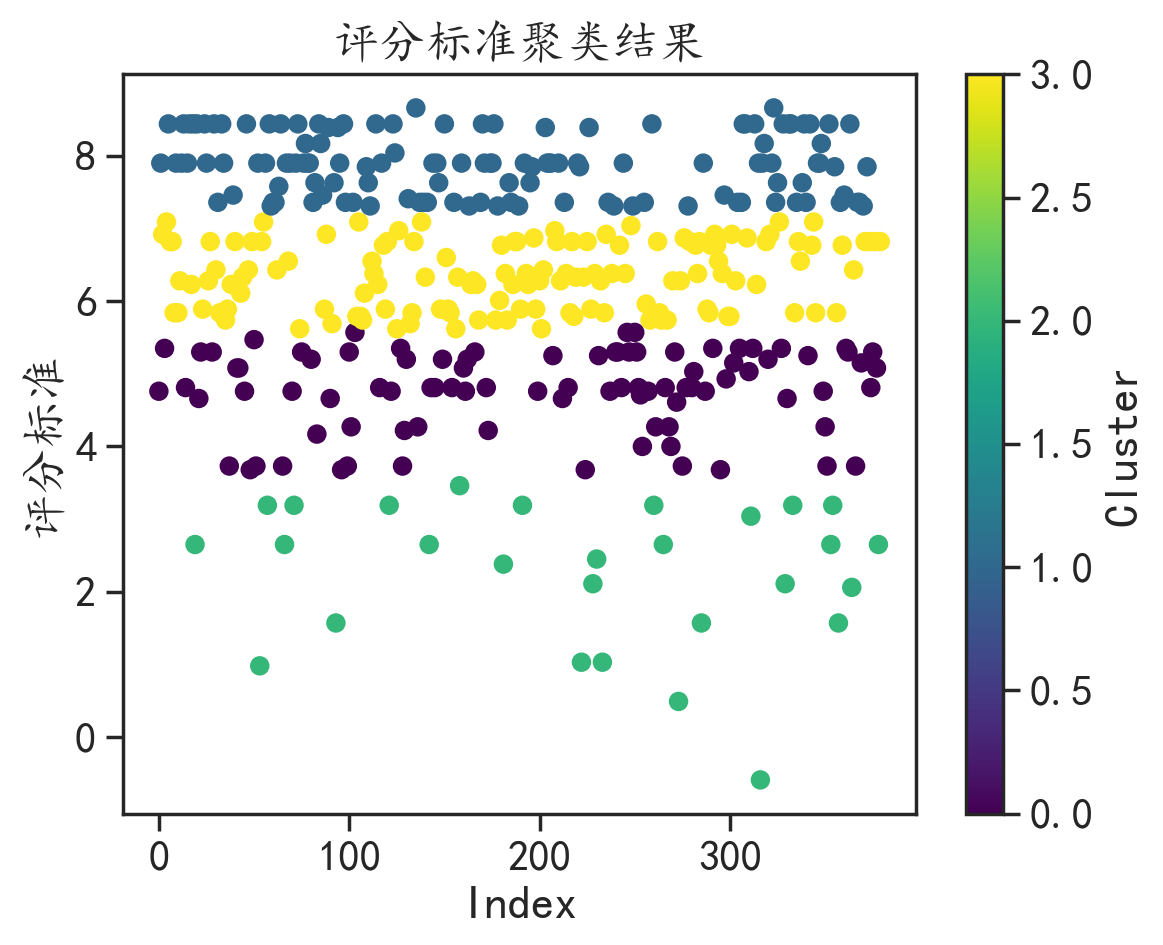

         count      mean       std
Cluster                           
0           91  4.782418  0.552536
1          127  7.885748  0.424463
2           28  2.267500  0.990644
3          134  6.359179  0.451750


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. 读取数据文件data.csv并加载为DataFrame
df = pd.read_csv('data7.csv')

# 2. 提取评分标准这一列作为聚类的数据
data_for_clustering = df['评分标准'].values.reshape(-1, 1)

# 3. 进行KMeans聚类分析，设置聚类个数为4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# 4. 将聚类结果加入DataFrame
df['Cluster'] = clusters

# 5. 可视化聚类结果
plt.scatter(df.index, df['评分标准'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('评分标准')
plt.title('评分标准聚类结果')
plt.colorbar(label='Cluster')
plt.show()

# 6. 保存结果到表中
df.to_csv('clustered_data.csv', index=False)

# 7. 聚类汇总
cluster_summary = df.groupby('Cluster')['评分标准'].agg(['count', 'mean', 'std'])
print(cluster_summary)


In [9]:
# 聚类汇总
cluster_summary = df.groupby('Cluster')['评分标准'].agg(['count', 'mean', 'std'])

# 按照聚类标签的平均值对聚类进行排序
sorted_clusters = cluster_summary.sort_values(by='mean').index

# 给聚类重新赋值，使得0对应的平均值最小，3对应的最大
cluster_mapping = {cluster: new_label for new_label, cluster in enumerate(sorted_clusters)}
df['Cluster'] = df['Cluster'].map(cluster_mapping)

# 重新计算聚类汇总，按照重新赋值后的聚类标签进行分组
cluster_summary_sorted = df.groupby('Cluster')['评分标准'].agg(['count', 'mean', 'std'])

# 输出重新赋值后的聚类汇总
print(cluster_summary_sorted)

         count      mean       std
Cluster                           
0           28  2.267500  0.990644
1           91  4.782418  0.552536
2          134  6.359179  0.451750
3          127  7.885748  0.424463


d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


             count      mean       std
New_Cluster                           
0               28  2.267500  0.990644
1               91  4.782418  0.552536
2              134  6.359179  0.451750
3              127  7.885748  0.424463


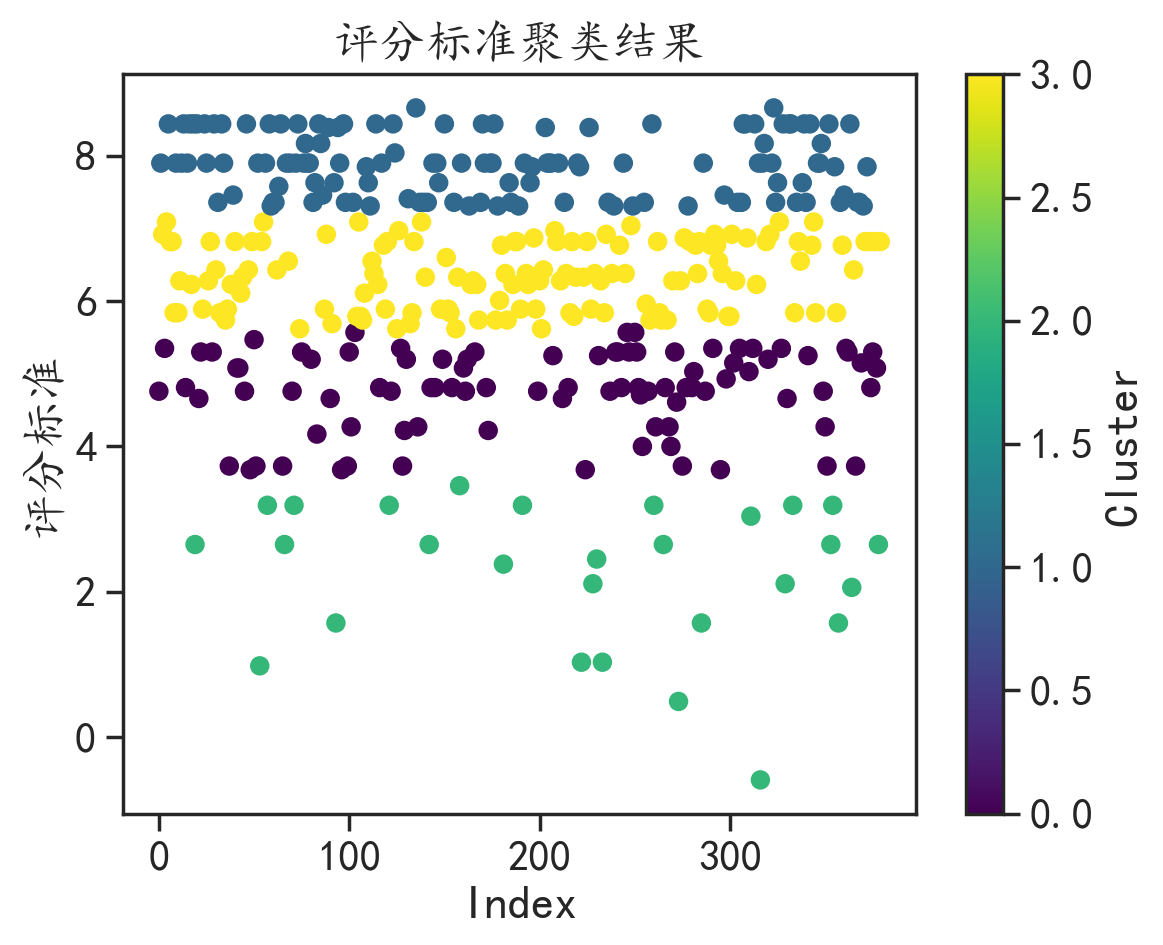

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. 读取数据文件data.csv并加载为DataFrame
df = pd.read_csv('data7.csv')

# 2. 提取评分标准这一列作为聚类的数据
data_for_clustering = df['评分标准'].values.reshape(-1, 1)

# 3. 进行KMeans聚类分析，设置聚类个数为4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# 4. 将聚类结果加入DataFrame
df['Cluster'] = clusters

# 5. 聚类汇总
cluster_summary = df.groupby('Cluster')['评分标准'].agg(['count', 'mean', 'std'])

# 6. 按照聚类标签的平均值对聚类进行排序，并重新赋值
sorted_clusters = cluster_summary.sort_values(by='mean').index
cluster_mapping = {cluster: new_label for new_label, cluster in enumerate(sorted_clusters)}
df['New_Cluster'] = df['Cluster'].map(cluster_mapping)

# 7. 输出重新赋值后的聚类汇总
cluster_summary_sorted = df.groupby('New_Cluster')['评分标准'].agg(['count', 'mean', 'std'])
print(cluster_summary_sorted)
# 5. 可视化聚类结果
plt.scatter(df.index, df['评分标准'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('评分标准')
plt.title('评分标准聚类结果')
plt.colorbar(label='Cluster')
plt.show()


# 8. 保存新的结果到源文件中
df.to_csv('data.csv', index=False)


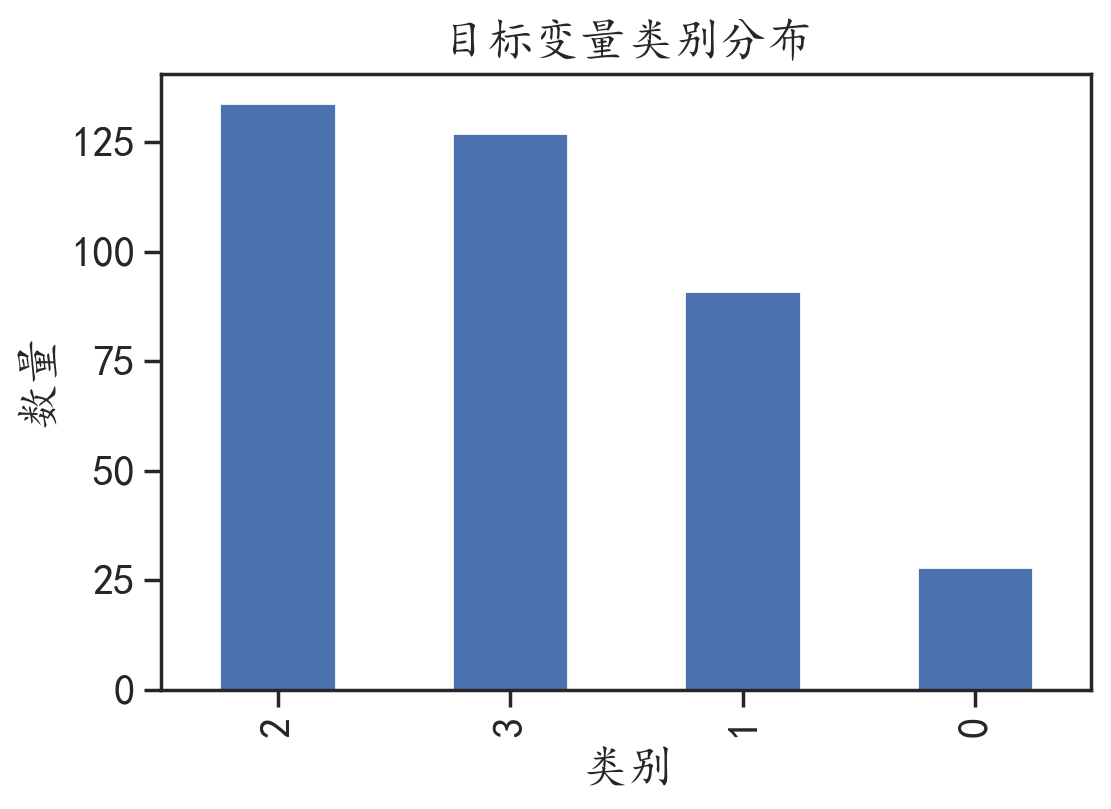

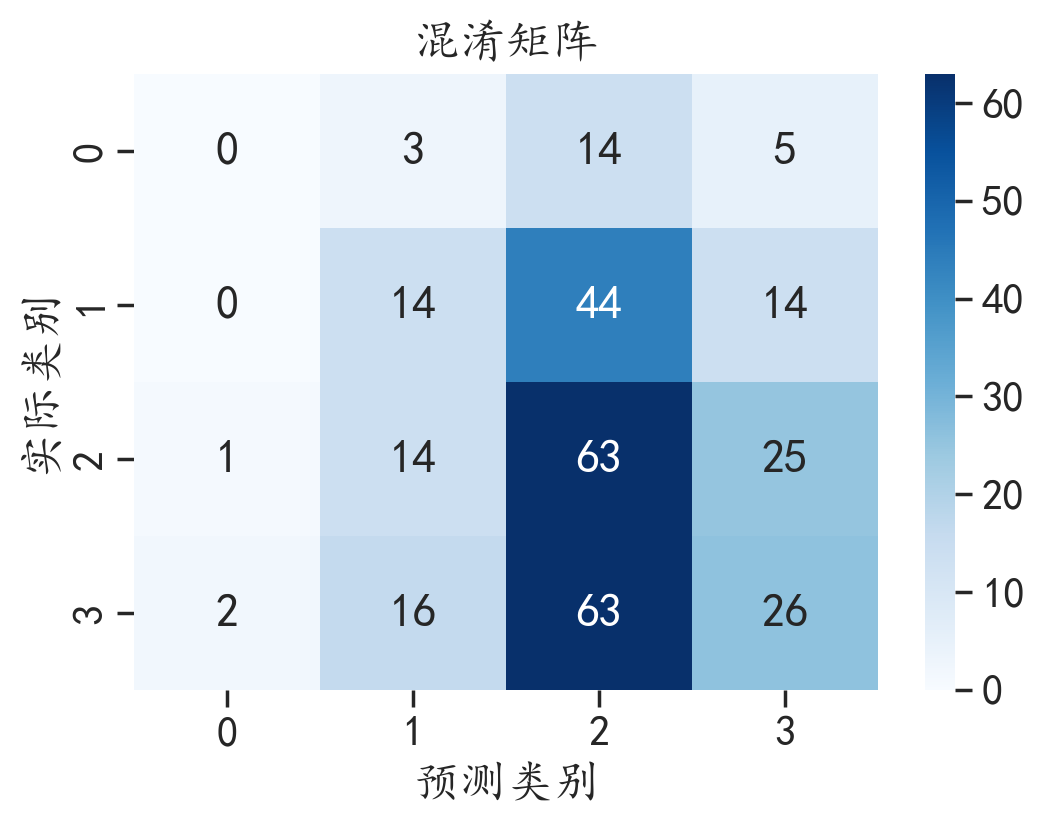

分类报告：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.30      0.19      0.24        72
           2       0.34      0.61      0.44       103
           3       0.37      0.24      0.29       107

    accuracy                           0.34       304
   macro avg       0.25      0.26      0.24       304
weighted avg       0.32      0.34      0.31       304



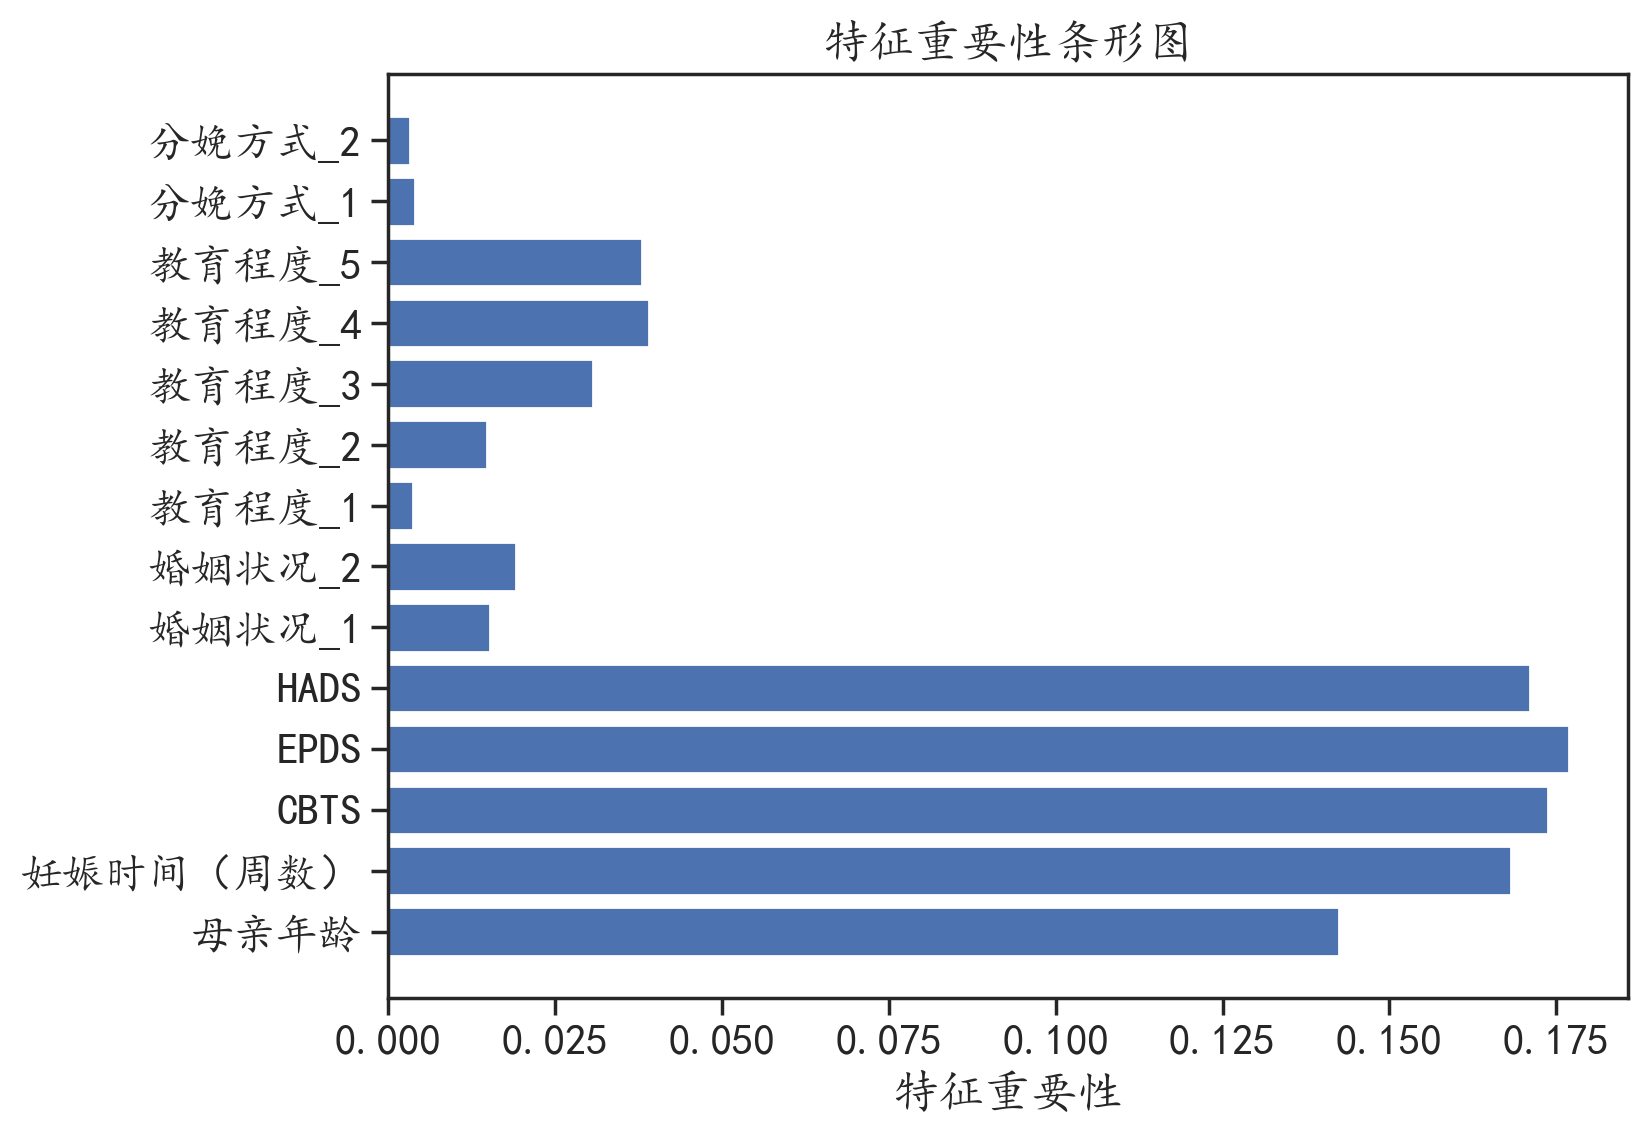

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 读取数据
data = pd.read_csv('data.csv')

# 自变量
X = data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 因变量
y = data['睡眠质量']

# 对婚姻状况、教育程度、分娩方式进行热编码
X_encoded = pd.get_dummies(X, columns=['婚姻状况', '教育程度', '分娩方式'])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.8, random_state=42)

# 建立随机森林模型
model = RandomForestClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 绘制目标变量类别分布（条形图）
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.xlabel("类别")
plt.ylabel("数量")
plt.title("目标变量类别分布")
plt.show()

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵（热图）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("预测类别")
plt.ylabel("实际类别")
plt.title("混淆矩阵")
plt.show()

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 绘制特征重要性条形图
plt.figure(figsize=(8, 6))
feat_importance = model.feature_importances_
feat_names = X_encoded.columns
plt.barh(feat_names, feat_importance)
plt.xlabel('特征重要性')
plt.title('特征重要性条形图')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [34]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [35]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found: 0.49


In [37]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [45]:
import pandas as pd

new_data = pd.read_csv('pred.csv')

In [51]:
# 假设新数据的特征与训练数据相同，直接选取相同的特征列
X_new = new_data[['母亲年龄', '婚姻状况', '教育程度', '妊娠时间（周数）', '分娩方式', 'CBTS', 'EPDS', 'HADS']]

# 对婚姻状况、教育程度、分娩方式进行热编码
X_new_encoded = pd.get_dummies(X_new, columns=['婚姻状况', '教育程度', '分娩方式'])

In [52]:
# 使用之前调优过的最佳模型
best_model = grid_search.best_estimator_

# # 对新数据进行预测
#y_pred_new = best_model.predict(X_new_encoded)
y_pred_new = model.predict(X_new_encoded)

In [53]:
new_data_with_predictions = new_data.copy()
new_data_with_predictions['Predicted_婴儿行为特征'] = y_pred_new

# Print the new DataFrame
# Print rows from index 390 to the end
print(new_data_with_predictions.tail(20))

     母亲年龄  婚姻状况  教育程度  妊娠时间（周数）  分娩方式  CBTS  EPDS  HADS   编号  Predicted_婴儿行为特征
381    29     2     4      40.0     1     7    15    12  382                 2
382    29     2     3      42.0     1     9    14    12  383                 2
383    23     2     2      38.5     1     7    12     7  384                 2
384    27     2     3      36.3     1     8     4     5  385                 2
385    36     2     4      39.0     1     6     6     8  386                 2
386    30     2     5      41.2     1     5     8     5  387                 2
387    28     2     2      40.6     1     8    11     9  388                 2
388    32     2     5      37.0     1     3     6     7  389                 2
389    28     2     5      38.0     1     7    11     5  390                 2
390    31     2     4      42.0     1     4     5     8  391                 2
391    25     2     2      40.5     1    16    22    15  392                 2
392    27     2     5      40.4     1     4     6   